In [1]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt, animation
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Proj
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import matplotlib
import xarray as xr

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



In [2]:
sim_jim=xr.open_mfdataset(r'C:\Users\prith\Downloads\pylag_1.nc')
sim_jim

<xarray.Dataset>
Dimensions:                   (time: 367, particles: 41600)
Coordinates:
  * time                      (time) datetime64[ns] 2020-01-01T12:00:00 ... 2...
Dimensions without coordinates: particles
Data variables:
    group_id                  (particles) int32 dask.array<chunksize=(41600,), meta=np.ndarray>
    longitude                 (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    latitude                  (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    depth                     (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    host_arakawa_a            (time, particles) int32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    host_atmosphere           (time, particles) int32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    error_status              (time, particles) int32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    in_domain                 (time, particles) int32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    is_beached                (time, particles) int32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    land_boundary_encounters  (time, particles) int32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
Attributes:
    title:    PyLag -- Plymouth Marine Laboratory

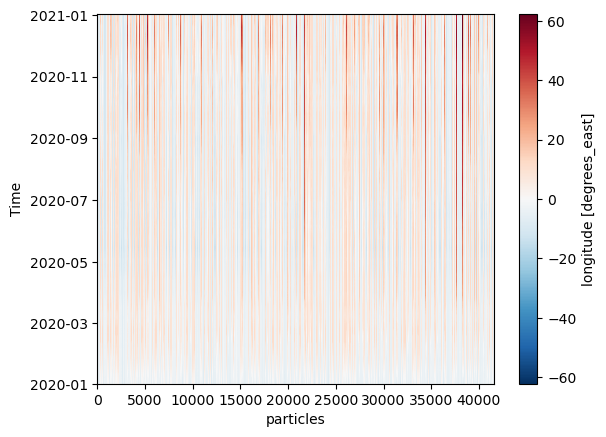

In [3]:
sim_jim.longitude.compute().plot()

In [4]:

lon_range = (3.5,6)  # Longitude range
lat_range = (59.6,61.2)  # latitude range

in_range =  sim_jim.where(sim_jim.latitude.compute() > lat_range[0]).where(sim_jim.latitude.compute() < lat_range[1]).where(sim_jim.longitude.compute() > lon_range[0]).where(sim_jim.longitude.compute() < lon_range[1])
in_range


<xarray.Dataset>
Dimensions:                   (particles: 41600, time: 367)
Coordinates:
  * time                      (time) datetime64[ns] 2020-01-01T12:00:00 ... 2...
Dimensions without coordinates: particles
Data variables:
    group_id                  (particles, time) float64 dask.array<chunksize=(41600, 367), meta=np.ndarray>
    longitude                 (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    latitude                  (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    depth                     (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    host_arakawa_a            (time, particles) float64 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    host_atmosphere           (time, particles) float64 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    error_status              (time, particles) float64 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    in_domain                 (time, particles) float64 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    is_beached                (time, particles) float64 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    land_boundary_encounters  (time, particles) float64 dask.array<chunksize=(367, 41600), meta=np.ndarray>
Attributes:
    title:    PyLag -- Plymouth Marine Laboratory

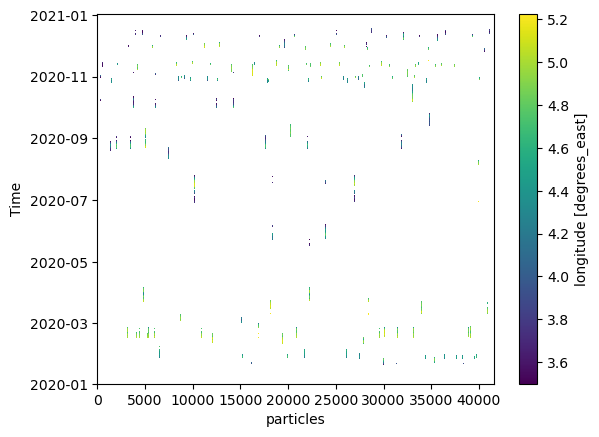

In [5]:
in_range.longitude.compute().plot()


In [6]:
# Using the [] operator, to extract only necessary variables
subset = in_range[['latitude', 'longitude']]
subset

<xarray.Dataset>
Dimensions:    (time: 367, particles: 41600)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T12:00:00 ... 2021-01-01T12:00:00
Dimensions without coordinates: particles
Data variables:
    latitude   (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
    longitude  (time, particles) float32 dask.array<chunksize=(367, 41600), meta=np.ndarray>
Attributes:
    title:    PyLag -- Plymouth Marine Laboratory

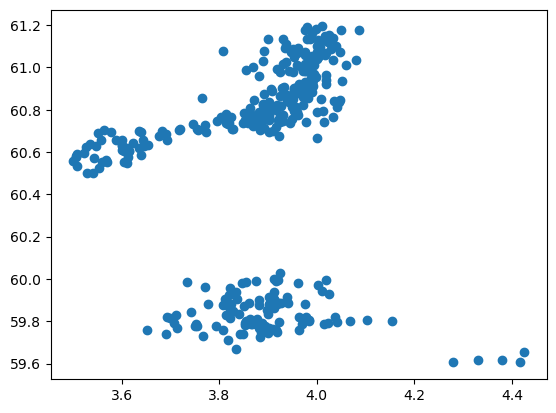

In [7]:
plt.scatter(subset.isel(time=20).longitude.compute(),subset.isel(time=20).latitude.compute())
#plt.scatter(in_range.isel(time=21).longitude.compute(),in_range.isel(time=21).latitude.compute())

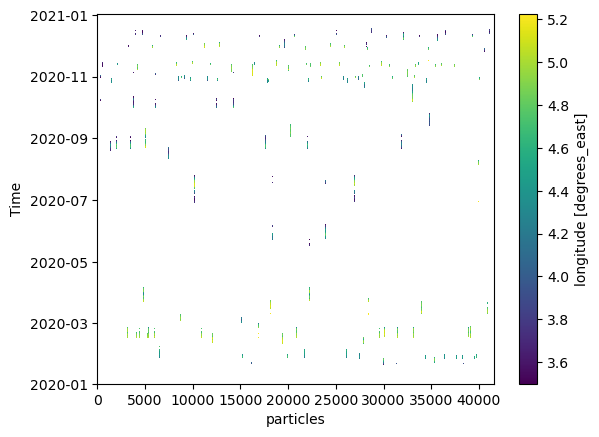

In [8]:
subset.longitude.plot()

In [9]:
#subset.isel(particles=2).longitude.plot.scatter()
entry_counts = subset.isel(particles=slice(2,10)).latitude.count(dim='time').values
num = (entry_counts > 0).sum()
num
print(entry_counts)

[ 3  0  3 13  5  5  3  0]


In [ ]:
## DO NOT USE THIS LOOP, takes lot of time


# Initialize counters
num_particles_in_region = 0
particle_entry_counts = []

# Loop over all particles

for i in range(100):
#for i in range(len(subset.particles)):
    particle = subset.isel(particles=i)
    
    # Count the number of time steps when the particle is in the region
    num_times_in_region = particle.latitude.count().values
    
    # If the particle entered the region at least once, increment the counter
    # and store the number of times it entered the region
    if num_times_in_region > 0:
        num_particles_in_region += 1
        particle_entry_counts.append(num_times_in_region)
particle_entry_counts = np.array(particle_entry_counts)

# Calculate statistics
#mean_entries = particle_entry_counts.mean()
#min_entries = particle_entry_counts.min()
#max_entries = particle_entry_counts.max()

#print(f"Average number of entries per particle: {mean_entries}")
#print(f"Minimum number of entries for a particle: {min_entries}")
#print(f"Maximum number of entries for a particle: {max_entries}")
        
print(f"Number of particles that entered the region: {num_particles_in_region}")
print(f"Number of times each particle entered the region: {particle_entry_counts}")


In [10]:
# Count the number of times each particle is in the region
# This should give me an array of how many times (days) the particle was within the subregion 
entry_counts = subset.latitude.count(dim='time')

# the number of particles that entered the region at least once

num_particles_in_region = (entry_counts > 0).sum().values
entry_counts_np = entry_counts.values # making it a numpy array

# Some statistics
mean_entries = entry_counts_np[entry_counts_np > 0].mean()
min_entries = entry_counts_np[entry_counts_np > 0].min()
max_entries = entry_counts_np[entry_counts_np > 0].max()

print(f"Number of particles that entered the region: {num_particles_in_region}")
print(f"Average number of entries per particle: {mean_entries}")
print(f"Minimum number of entries for a particle: {min_entries}")
print(f"Maximum number of entries for a particle: {max_entries}")

Number of particles that entered the region: 14168
Average number of entries per particle: 6.669254658385094
Minimum number of entries for a particle: 1
Maximum number of entries for a particle: 97


In [11]:
print(entry_counts_np[entry_counts_np > 0])

[ 3  3 13 ...  5  3  3]


Text(0.5, 1.0, 'Time = 2020-01-01')

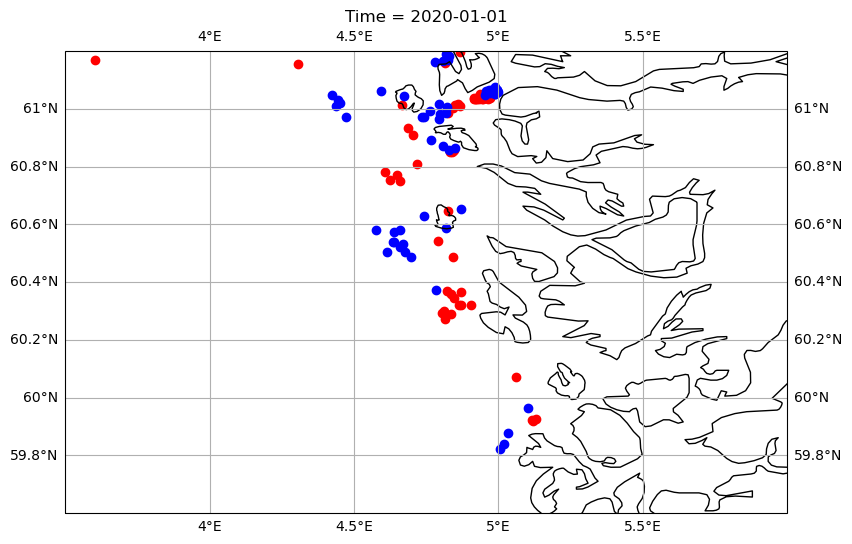

In [12]:

minlon, maxlon, minlat, maxlat = (lon_range[0],lon_range[1], lat_range[0],lat_range[1])


proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(13, 6))
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()
plt.scatter(in_range.isel(time=99).longitude.compute(),in_range.isel(time=99).latitude.compute(),color='red')
plt.scatter(in_range.isel(time=100).longitude.compute(),in_range.isel(time=100).latitude.compute(),color='blue')




#plt.scatter(in_range.longitude.compute(),in_range.latitude.compute(),s=0.08)
#main_ax.set_title("particle locations")
main_ax.set_title("Time = " + str(in_range.coords['time'].values[0])[:10])


Making an attempt to loop over all files for a single country
   

In [13]:
import glob
import os
# This is for a single country; change the name of the country if you wish to extract for some other country

# The directory and file pattern
directory = r'C:\Users\prith\Downloads\Simulations\ocean_leeway\Belgium'
file_pattern = '**/output/pylag_1.nc'

# Geting a list of all files with this pattern
files = glob.glob(os.path.join(directory, file_pattern), recursive=True)

len(files)

48

In [14]:
files



['C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\01\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\02\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\03\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\04\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\05\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\06\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\07\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\08\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\09\\output\\pylag_1.nc',
 'C:\\Users\\prith\\Downloads\\Simulations\\ocean_leeway\\Belgium\\2017\\10\\output\\pylag_1.nc',
 'C:\\Users\\prith\\

In [15]:
# For one single file, testing this,select a random file
# It takes the in_range from previously run data

#lon_range = (3.5,6)  # Longitude range
#lat_range = (59.6,61.2)  # latitude range

dataset = xr.open_dataset(files[15])
dataset = dataset.sel(time=slice('2020-01-01', '2020-12-31'))
in_range = dataset.where((dataset.latitude >= lat_range[0]) & (dataset.latitude <= lat_range[1]) & 
                                   (dataset.longitude >= lon_range[0]) & (dataset.longitude <= lon_range[1]))

subset = in_range[['latitude', 'longitude']]
entry_counts = subset.latitude.count(dim='time')
num_particles_in_region = (entry_counts > 0).sum().values
entry_counts_np = entry_counts.values


num_particles_in_region = ((~np.isnan(in_range.latitude)).sum(dim='time') > 0).sum().values
mean_entries = entry_counts_np[entry_counts_np > 0].mean()
min_entries = entry_counts_np[entry_counts_np > 0].min()
max_entries = entry_counts_np[entry_counts_np > 0].max()

In [16]:
entry_counts

<xarray.DataArray 'latitude' (particles: 800)>
array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 59,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 11,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
...
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])
Dimensions without coordinates: particles

In [17]:
num_particles_in_region

array(9)

In [18]:
# This should print everything for me

# Loop over all the files
for file in files:
    # Extract start year and month from the file path
    start_month = os.path.basename(os.path.dirname(os.path.dirname(file)))
    start_year = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(file))))

    # Opening the file with xarray
    dataset = xr.open_dataset(file)
    
    # Selecting the data for the year 2020 only
    dataset_2020 = dataset.sel(time=slice('2020-01-01', '2020-12-31'))

    
    # Extract the sub region of our interest
    in_range = dataset_2020.where((dataset_2020.latitude >= lat_range[0]) & (dataset_2020.latitude <= lat_range[1]) & 
                                   (dataset_2020.longitude >= lon_range[0]) & (dataset_2020.longitude <= lon_range[1]))

    # Subset the dataset
    subset = in_range[['latitude', 'longitude']]
    
    # Count the number of times each particle is in the region
    # This gives an array (of length = number of particles) of how many times each particle has entered the region
    entry_counts = subset.latitude.count(dim='time')
    
    # This gives the number of particles that entered the region at least once
    num_particles_in_region = (entry_counts > 0).sum().values

    # Converting the entry_counts DataArray to a numpy array for easier calculations
    entry_counts_np = entry_counts.values

    # Calculating some statistics
    mean_entries = entry_counts_np[entry_counts_np >= 0].mean()
    min_entries = entry_counts_np[entry_counts_np >= 0].min()
    max_entries = entry_counts_np[entry_counts_np >= 0].max()

    # Printing part
    print("")
    #print(f"File: {file}")
    print(f"Start year: {start_year}, Start month: {start_month}")
    print(f"Number of particles that entered the region: {num_particles_in_region}")
    print(f"Average number of entries per particle: {mean_entries}")
    print(f"Minimum number of entries for a particle: {min_entries}")
    print(f"Maximum number of entries for a particle: {max_entries}")



Start year: 2017, Start month: 01
Number of particles that entered the region: 0
Average number of entries per particle: 0.0
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 0

Start year: 2017, Start month: 02
Number of particles that entered the region: 1
Average number of entries per particle: 0.01125
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 9

Start year: 2017, Start month: 03
Number of particles that entered the region: 0
Average number of entries per particle: 0.0
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 0

Start year: 2017, Start month: 04
Number of particles that entered the region: 0
Average number of entries per particle: 0.0
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 0

Start year: 2017, Start month: 05
Number of particles that entered the region: 0
Average number of entries per particle: 0.0
Minimum number


Start year: 2020, Start month: 03
Number of particles that entered the region: 604
Average number of entries per particle: 3.525
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 35

Start year: 2020, Start month: 04
Number of particles that entered the region: 495
Average number of entries per particle: 2.75375
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 31

Start year: 2020, Start month: 05
Number of particles that entered the region: 489
Average number of entries per particle: 2.97875
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 37

Start year: 2020, Start month: 06
Number of particles that entered the region: 222
Average number of entries per particle: 1.21
Minimum number of entries for a particle: 0
Maximum number of entries for a particle: 35

Start year: 2020, Start month: 07
Number of particles that entered the region: 267
Average number of entries per particl

In [19]:
# This is a test for creating the Pandas dataframe above for 1 single file.
# Tested with Belgium, above is UK
file = r'C:\Users\prith\Downloads\Simulations\ocean_leeway\Belgium\2018\12\output\pylag_1.nc'
sim = xr.open_dataset(file)
sim = sim.sel(time=slice('2020-01-01', '2020-12-31'))  # Select only 2020
in_range =  sim.where(sim.latitude > lat_range[0]).where(sim.latitude < lat_range[1]).where(sim.longitude > lon_range[0]).where(sim.longitude < lon_range[1])
num_particles_in_region = ((~np.isnan(in_range.latitude)).sum(dim='time') > 0).sum().values


if num_particles_in_region > 0:  # Only calculate these if there are particles in the region
    num_entries_per_particle = (~np.isnan(in_range.latitude)).sum(dim='time').values
    mean_entries = num_entries_per_particle.mean()
    min_entries = num_entries_per_particle.min()
    max_entries = num_entries_per_particle.max()
else:  # If no particles in the region, these are all zero
    mean_entries = 0
    min_entries = 0
    max_entries = 0

In [20]:
#num_entries_per_particle.sum()
#((~np.isnan(in_range.latitude)).sum(dim='time') > 0).sum()
(~np.isnan(in_range.latitude)).sum(dim='time').values

array([  0,   0,   0,   0,   0,   0,   0,   6,   0,   6,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  27,   0,   0,   0,
         0,   5,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,  17,
         0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3,  29,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2,   0,   2,   0,   0,   0,   0,   0,  11,   9,   0,   0,   0,
         0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,  21,
         0,   0,   2,   0,   0,   0,   0,   3,   0,   7,  44,   0,   0,
         0,   0,   0,  14,   0,   4,   0,  13,   3,   0,   0,   0,   0,
         0,   0,  13,   0,   0,   0,  18,   0,   0,   0,  10,   0,   0,
        12,   0,   0,   2,   0,   0,   0,   3,   0,   2,   0,   

In [21]:
print('Mean entries with zeros',(~np.isnan(in_range.latitude)).sum(dim='time').values.mean())
print('Mean entries without zeros',(~np.isnan(in_range.latitude)).sum(dim='time').values[(~np.isnan(in_range.latitude)).sum(dim='time').values>0].mean())

(~np.isnan(in_range.latitude)).sum(dim='time').values[(~np.isnan(in_range.latitude)).sum(dim='time').values>0]


Mean entries with zeros 1.645
Mean entries without zeros 9.605839416058394


array([  6,   6,  10,  27,   5,   6,  17,   3,   3,  29,   2,   2,  11,
         9,   6,   6,  21,   2,   3,   7,  44,  14,   4,  13,   3,  13,
        18,  10,  12,   2,   3,   2,   7,   3,   3,  48,   4,  10,   4,
        43,  27,  10,   3,  44,   5,   2,   7,   8,   3,  10,   5,  11,
         4,  13,   5,   2,  12,   8,   2,   2,   7,   3,  10,   2,   3,
        15,  10,   4,   4,   5,   7,  11,   4,   5,   4,  10,   2,  14,
         6,   5,   8,   3,   9, 139,   5,   5,  14,   3,   2,   3,   3,
        15,  11,  17,   5,  11,  10,   6,   4,  14,   3,   3,  11,  10,
         9,   6,   5,   3,   7,   2,   9,  10,   6,   4,   2,   3,   9,
         3,  11,  21,   3,   7,  15,   5,   5,  10,  31,   1,   4,   6,
        17,  12,   5,   7,   2,   3,   4])

In [23]:
import pandas as pd
from datetime import datetime
# Create an empty list to hold the data
data = []
# Check name of country
# Loop through files
for start_year in range(2017, 2021):
    for start_month in range(1, 13):
        #file = 'C:\Users\prith\Downloads\Simulations\ocean_leeway\UK\' + {start_year} + 'output\pylag_1.nc'
        file = fr'C:\Users\prith\Downloads\Simulations\ocean_leeway\Belgium\{start_year}\{start_month:02}\output\pylag_1.nc'

        print(start_year,start_month)
        if os.path.exists(file):
            sim = xr.open_dataset(file)
            sim = sim.sel(time=slice('2020-01-01', '2020-12-31'))  # Select only 2020
            in_range =  sim.where(sim.latitude > lat_range[0]).where(sim.latitude < lat_range[1]).where(sim.longitude > lon_range[0]).where(sim.longitude < lon_range[1])
            num_particles_in_region = ((~np.isnan(in_range.latitude)).sum(dim='time') > 0).sum().values
            
            # Sometimes we do not find particles in the region at all, for a specific file(country/month),
            # so the If condition is necessary in the next line
            
            if num_particles_in_region > 0:  # Only calculate these if there are particles in the region
                num_entries_per_particle = (~np.isnan(in_range.latitude)).sum(dim='time').values
                mean_entries = num_entries_per_particle.mean()
                min_entries = num_entries_per_particle.min()
                max_entries = num_entries_per_particle.max()
            else:  # If no particles in the region, these are all zero
                mean_entries = 0
                min_entries = 0
                max_entries = 0
                
            # Append the data for this file to the list
            data.append({
                'Start Year': start_year,
                'Start Month': start_month,
                'time': datetime(start_year, start_month, 1), 
                'Country' : file[50:-26],
                'Num Particles in Region': num_particles_in_region,
                'Mean Entries': mean_entries,
                'Min Entries': min_entries,
                'Max Entries': max_entries
            })

# Convert the list into a DataFrame
df = pd.DataFrame(data)

# Now you can print or save the DataFrame, or perform further analysis
#print(df)


2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


In [24]:
df

,Start Year,Start Month,time,Country,Num Particles in Region,Mean Entries,Min Entries,Max Entries
0,2017,1,2017-01-01,Belgium,0,0.00000,0,0
1,2017,2,2017-02-01,Belgium,1,0.01125,0,9
2,2017,3,2017-03-01,Belgium,0,0.00000,0,0
3,2017,4,2017-04-01,Belgium,0,0.00000,0,0
4,2017,5,2017-05-01,Belgium,0,0.00000,0,0
5,2017,6,2017-06-01,Belgium,1,0.00750,0,6
6,2017,7,2017-07-01,Belgium,3,0.02000,0,10
7,2017,8,2017-08-01,Belgium,2,0.00750,0,3
8,2017,9,2017-09-01,Belgium,0,0.00000,0,0
9,2017,10,2017-10-01,Belgium,1,0.00625,0,5


In [40]:
np.where(num_entries_per_particle==12)
#np.where(num_entries_per_particle==139)


(array([275, 296, 583, 728, 729, 764, 796], dtype=int64),)

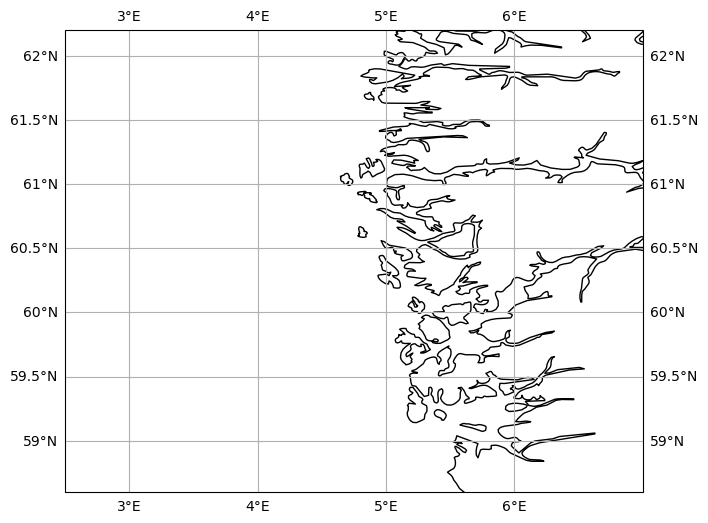

In [44]:
#in_range.isel(particles=slice(441,442)).plot.line(x='longitude',y='latitude')

minlon, maxlon, minlat, maxlat = (lon_range[0]-1,lon_range[1]+1, lat_range[0]-1,lat_range[1]+1)


proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(13, 6))
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()



plt.plot(sim.isel(particles=276).longitude,sim.isel(particles=276).latitude,color='gray')
plt.plot(in_range.isel(particles=274).longitude,in_range.isel(particles=441).latitude,color='orange')
plt.scatter(in_range.isel(particles=274).longitude[0],in_range.isel(particles=441).latitude[0],color='red')


In [51]:
in_range

<xarray.Dataset>
Dimensions:                   (particles: 800, time: 31)
Coordinates:
  * time                      (time) datetime64[ns] 2020-12-01T12:00:00 ... 2...
Dimensions without coordinates: particles
Data variables:
    group_id                  (particles, time) float64 nan nan nan ... nan nan
    longitude                 (time, particles) float32 nan nan nan ... nan nan
    latitude                  (time, particles) float32 nan nan nan ... nan nan
    depth                     (time, particles) float32 nan nan nan ... nan nan
    host_arakawa_a            (time, particles) float64 nan nan nan ... nan nan
    host_atmosphere           (time, particles) float64 nan nan nan ... nan nan
    error_status              (time, particles) float64 nan nan nan ... nan nan
    in_domain                 (time, particles) float64 nan nan nan ... nan nan
    is_beached                (time, particles) float64 nan nan nan ... nan nan
    land_boundary_encounters  (time, particles) float64 nan nan nan ... nan nan
Attributes:
    title:    PyLag -- Plymouth Marine Laboratory

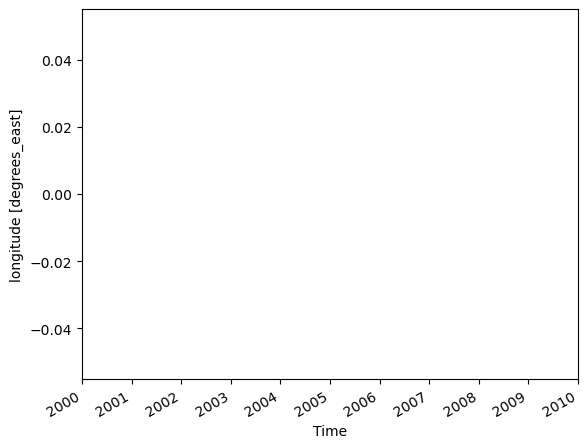

In [46]:
in_range.isel(particles=441).longitude.plot()

In [52]:
df

,Start Year,Start Month,time,Country,Num Particles in Region,Mean Entries,Min Entries,Max Entries
0,2017,1,2017-01-01,Belgium,0,0.00000,0,0
1,2017,2,2017-02-01,Belgium,1,0.01125,0,9
2,2017,3,2017-03-01,Belgium,0,0.00000,0,0
3,2017,4,2017-04-01,Belgium,0,0.00000,0,0
4,2017,5,2017-05-01,Belgium,0,0.00000,0,0
5,2017,6,2017-06-01,Belgium,1,0.00750,0,6
6,2017,7,2017-07-01,Belgium,3,0.02000,0,10
7,2017,8,2017-08-01,Belgium,2,0.00750,0,3
8,2017,9,2017-09-01,Belgium,0,0.00000,0,0
9,2017,10,2017-10-01,Belgium,1,0.00625,0,5


In [53]:
num_entries_per_particle
#data

array([ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  7,  0,  0,  0,  0,  0,  0,
        0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  3,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,
        0,  8,  0,  6,  6,  7,  7,  0,  0,  6,  7,  0,  0,  0,  5,  7,  3,
        0,  0,  7, 11,  0

In [54]:
subset.groupby("particles")

DatasetGroupBy, grouped over 'particles'
800 groups with labels 0, 1, 2, 3, 4, ..., 796, 797, 798, 799.

In [55]:
k=103
#for k in range(102,104):
in_region = ~(subset.isel(particles = k).latitude.isnull() | subset.isel(particles = k).longitude.isnull())
in_region
#plt.show()

<xarray.DataArray (time: 31)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01T12:00:00 ... 2020-12-31T12:00:00

In [56]:
in_region.astype(int)


<xarray.DataArray (time: 31)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01T12:00:00 ... 2020-12-31T12:00:00

In [57]:
in_region.astype(int).diff(dim='time')
# if a particle moves into the region, the difference would be 1
# If a particle stays in the region or stays out of the region, the difference would be 0 (state doesn't change)
# If a particle moves out of the region, the difference would be -1.

<xarray.DataArray (time: 30)>
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-02T12:00:00 ... 2020-12-31T12:00:00

In [58]:
(in_region.astype(int).diff(dim='time') == 1).sum()
# This will give me the number of 1s and give me an idea about re-entries

<xarray.DataArray ()>
array(0)

In [59]:
subset

<xarray.Dataset>
Dimensions:    (time: 31, particles: 800)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-01T12:00:00 ... 2020-12-31T12:00:00
Dimensions without coordinates: particles
Data variables:
    latitude   (time, particles) float32 nan nan nan nan nan ... nan nan nan nan
    longitude  (time, particles) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:    PyLag -- Plymouth Marine Laboratory

In [60]:
def get_reentries(particle_data):
    # Determine whether the particle is in the region at each time step
    in_region = ~(particle_data.latitude.isnull() | particle_data.longitude.isnull())

    # Calculating re-entries
    # Subtract the shifted series from the original series we do this by taking a derivative
    # Entries of 1 in the resulting series correspond to re-entries
    reentries = in_region.astype(int).diff(dim="time")
    
    # Count the number of re-entries
    num_reentries = (reentries == 1).sum()

    return num_reentries

# Use groupby to process each particle separately
num_reentries_per_particle = subset.groupby("particles").apply(get_reentries)

# Convert the result to a pandas DataFrame
reentry_data = num_reentries_per_particle.to_dataframe(name="Number of Reentries").reset_index()

In [61]:
#reentry_data.num_reentries_per_particle.plot.hist()
reentry_data

,particles,Number of Reentries
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
795,795,0
796,796,0
797,797,0
798,798,0


In [ ]:
# Don't use this, there's a small error

import pandas as pd
import os
import xarray as xr


# Define the function to calculate re-entries
def get_reentries(particle_data):
    # Using Or operator to see if particle is in the box or not
    in_region = ~(particle_data.latitude.isnull() | particle_data.longitude.isnull())
    reentries = in_region.astype(int).diff(dim="time")
    num_reentries = (reentries == 1).sum(dim="time")
    return num_reentries

results = []
# DataFrame to store the results
#results = pd.DataFrame(columns=["Start Year", "Start Month", "Time","Country" ,"Number of Particles in Region", 
#                                "Average Entries Per Particle", "Minimum Entries", "Maximum Entries", 
#                                "Average Reentries Per Particle", "Minimum Reentries", "Maximum Reentries"])

# Loop through the folders
for start_year in range(2017, 2021):
    for start_month in range(1, 13):
        file = fr'C:\Users\prith\Downloads\Simulations\ocean_leeway\Belgium\{start_year}\{start_month:02}\output\pylag_1.nc'
        print(start_year,start_month)
        # Check if the file exists
        if os.path.exists(file):
            ds = xr.open_dataset(file)

            # Select the data for 2020
            ds_2020 = ds.sel(time=slice('2020-01-01', '2020-12-31'))

            # Get the data within the region of interest
            lon_range = (3.5,6)  
            lat_range = (59.6,61.2) 
            subset = ds_2020.where((ds_2020.latitude > lat_range[0]) & (ds_2020.latitude < lat_range[1]) 
                                   & (ds_2020.longitude > lon_range[0]) & (ds_2020.longitude < lon_range[1]))

            #num_particles_in_region = subset['particles'].count(dim='time').compute()             
   
            num_particles_in_region = ((~np.isnan(subset.latitude)).sum(dim='time') > 0).sum().values
            
            if num_particles_in_region > 0:  # Only calculate these if there are particles in the region
                num_entries_per_particle = (~np.isnan(subset.latitude)).sum(dim='time').values
                mean_entries = num_entries_per_particle.mean()
                min_entries = num_entries_per_particle.min()
                max_entries = num_entries_per_particle.max()
            else:  # If no particles in the region, these are all zero
                mean_entries = 0
                min_entries = 0
                max_entries = 0
            

            #num_entries_per_particle = (~subset.latitude.isnull() & ~subset.longitude.isnull()).sum(dim='time').compute()
            
            num_reentries_per_particle = subset.groupby("particles").apply(get_reentries).compute().values

            #num_reentries_per_particle = np.array(num_reentries_per_particle)

            
            # Append the data for this file to the list
            results.append({
                #"Start Year": start_year,
                #"Start Month": start_month,
                'time': datetime(start_year, start_month, 1),
                'Country' : file[50:-26],
                "Number of Particles in Region": num_particles_in_region,
                "Average Entries Per Particle": mean_entries,
                "Minimum Entries": min_entries,
                "Maximum Entries": max_entries,
                "Average Reentries Per Particle": num_reentries_per_particle.mean(),
                "Minimum Reentries": num_reentries_per_particle.min(),
                "Maximum Reentries": num_reentries_per_particle.max()
            })
df1 = pd.DataFrame(results)
            
#df1.to_csv("results_UK.csv", index=False)


In [62]:
import pandas as pd
import os
import xarray as xr


# Define the function to calculate re-entries
def get_reentries(particle_data):
    # Using Or operator to see if particle is in the box or not
    in_region = ~(particle_data.latitude.isnull() | particle_data.longitude.isnull())
    reentries = in_region.astype(int).diff(dim="time")
    num_reentries = (reentries == 1).sum(dim="time")
    return num_reentries

results = []
# DataFrame to store the results
#results = pd.DataFrame(columns=["Start Year", "Start Month", "Time","Country" ,"Number of Particles in Region", 
#                                "Average Entries Per Particle", "Minimum Entries", "Maximum Entries", 
#                                "Average Reentries Per Particle", "Minimum Reentries", "Maximum Reentries"])

# Loop through the folders
for start_year in range(2017, 2021):
    for start_month in range(1, 13):
        file = fr'C:\Users\prith\Downloads\Simulations\ocean_leeway\Belgium\{start_year}\{start_month:02}\output\pylag_1.nc'
        print(start_year,start_month)
        # Check if the file exists
        if os.path.exists(file):
            ds = xr.open_dataset(file)

            # Select the data for 2020
            ds_2020 = ds.sel(time=slice('2020-01-01', '2020-12-31'))

            # Get the data within the region of interest
            lon_range = (3.5,6)  
            lat_range = (59.6,61.2) 
            subset = ds_2020.where((ds_2020.latitude > lat_range[0]) & (ds_2020.latitude < lat_range[1]) 
                                   & (ds_2020.longitude > lon_range[0]) & (ds_2020.longitude < lon_range[1]))

            #num_particles_in_region = subset['particles'].count(dim='time').compute()             
   
            num_particles_in_region = ((~np.isnan(subset.latitude)).sum(dim='time') > 0).sum().values
            
            if num_particles_in_region > 0:  # Only calculate these if there are particles in the region
                num_entries_per_particle = (~np.isnan(subset.latitude)).sum(dim='time').values
                mean_entries = num_entries_per_particle.mean()
                min_entries = num_entries_per_particle.min()
                max_entries = num_entries_per_particle.max()
            else:  # If no particles in the region, these are all zero
                mean_entries = 0
                min_entries = 0
                max_entries = 0
            

            #num_entries_per_particle = (~subset.latitude.isnull() & ~subset.longitude.isnull()).sum(dim='time').compute()
            
            num_reentries_per_particle = subset.groupby("particles").apply(get_reentries).compute().values

            #num_reentries_per_particle = np.array(num_reentries_per_particle)

            if len(num_reentries_per_particle[num_reentries_per_particle>0])==0:
                reentries_mean = 0;
                reentries_min = 0;
                reentries_max = 0;    
            else:
                reentries_mean = num_reentries_per_particle[num_reentries_per_particle>0].mean();
                reentries_min = num_reentries_per_particle[num_reentries_per_particle>0].min();
                reentries_max = num_reentries_per_particle[num_reentries_per_particle>0].max();
            # Append the data for this file to the list
            results.append({
                #"Start Year": start_year,
                #"Start Month": start_month,
                'time': datetime(start_year, start_month, 1),
                'Country' : file[50:-26],
                "Number of Particles in Region": num_particles_in_region,
                "Average Entries Per Particle": mean_entries,
                "Minimum Entries": min_entries,
                "Maximum Entries": max_entries,
                "Average Reentries Per Particle": reentries_mean,
                "Minimum Reentries": reentries_min,
                "Maximum Reentries": reentries_max
            })
df1 = pd.DataFrame(results)
            
#df1.to_csv("results_UK.csv", index=False)


2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


In [63]:
len(num_reentries_per_particle[num_reentries_per_particle>0])

0

In [ ]:
df1.to_csv("results_Belgium_new.csv", index=False)
df1

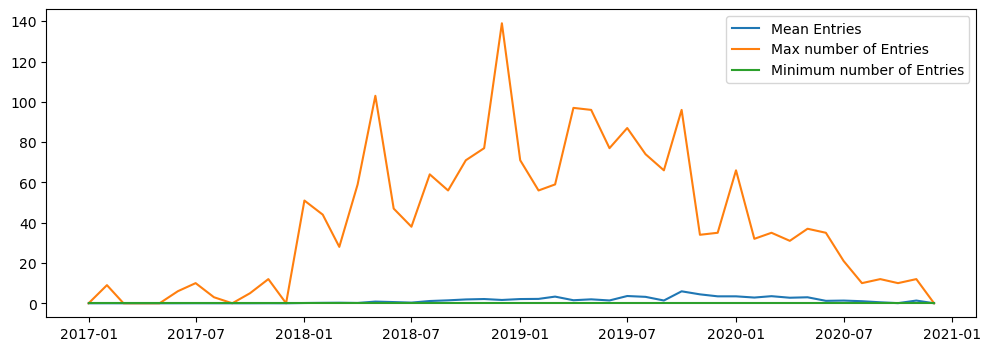

In [64]:
#df['Mean Entries'].plot.line(color = 'red')
plt.figure(figsize=(12, 4))
plt.plot(df['time'],df['Mean Entries'],label='Mean Entries')
plt.plot(df['time'],df['Max Entries'],label='Max number of Entries')
plt.plot(df['time'],df['Min Entries'],label='Minimum number of Entries')

#df.plot.line(x='time',y='Mean Entries')
plt.legend()
plt.show()
#df['Min Entries'].plot.line()


<AxesSubplot:xlabel='Start Year', ylabel='Start Month'>

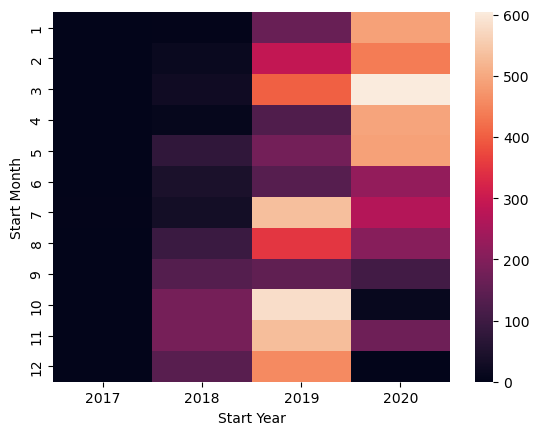

In [65]:
import seaborn as sns
pivot_table = df.pivot_table(values='Num Particles in Region', index='Start Month', columns='Start Year')
sns.heatmap(pivot_table)


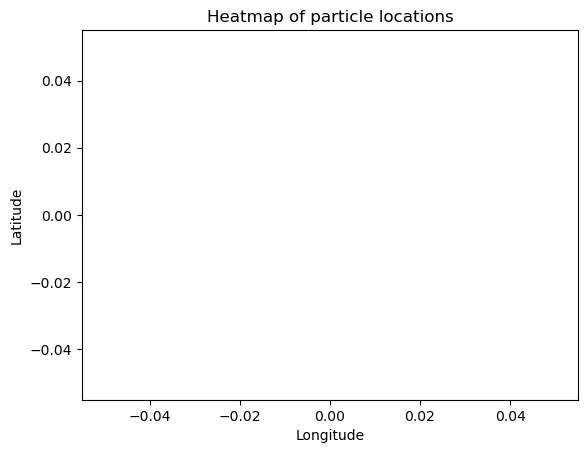

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'subset' is your data with lat, lon
latitudes = subset.latitude.values.flatten()
longitudes = subset.longitude.values.flatten()

# Remove NaN values
valid_indices = ~np.isnan(latitudes) & ~np.isnan(longitudes)
latitudes = latitudes[valid_indices]
longitudes = longitudes[valid_indices]

#plt.hist2d(longitudes, latitudes, bins=[100, 100], cmap='hot')
plt.scatter(longitudes, latitudes, color='blue',s=0.1)
#plt.colorbar(label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of particle locations')
plt.show()


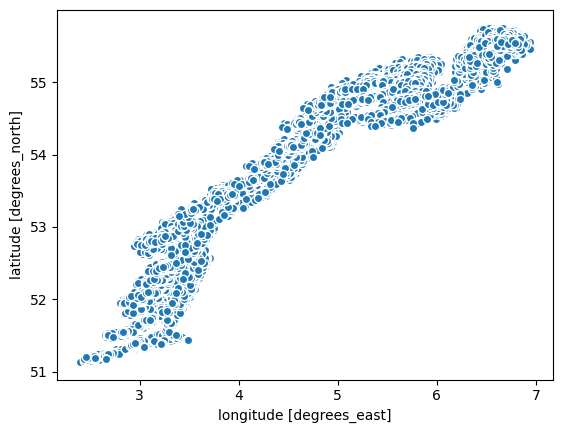

In [67]:
dataset = xr.open_dataset(files[47])
dataset = dataset.sel(time=slice('2020-01-01', '2020-12-31'))

dataset.plot.scatter(x='longitude',y='latitude')

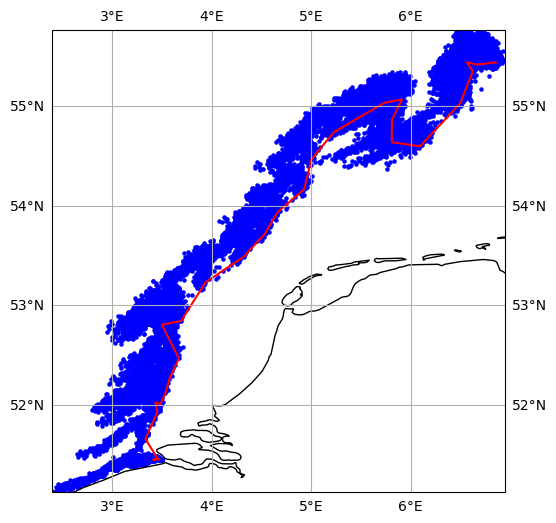

In [68]:
# Create a new matplotlib figure and set its size
fig = plt.figure(figsize=(12, 6))
minlon, maxlon, minlat, maxlat = (dataset.longitude.min(),dataset.longitude.max(), dataset.latitude.min(),dataset.latitude.max())

# Create a Cartopy PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.COASTLINE)


# Plot the particles
scat = ax.scatter(dataset.longitude, dataset.latitude, color='blue', transform=ccrs.PlateCarree(),s=5)
ax.plot(dataset.isel(particles=0).longitude, dataset.isel(particles=0).latitude, color='red', transform=ccrs.PlateCarree())

plt.show()


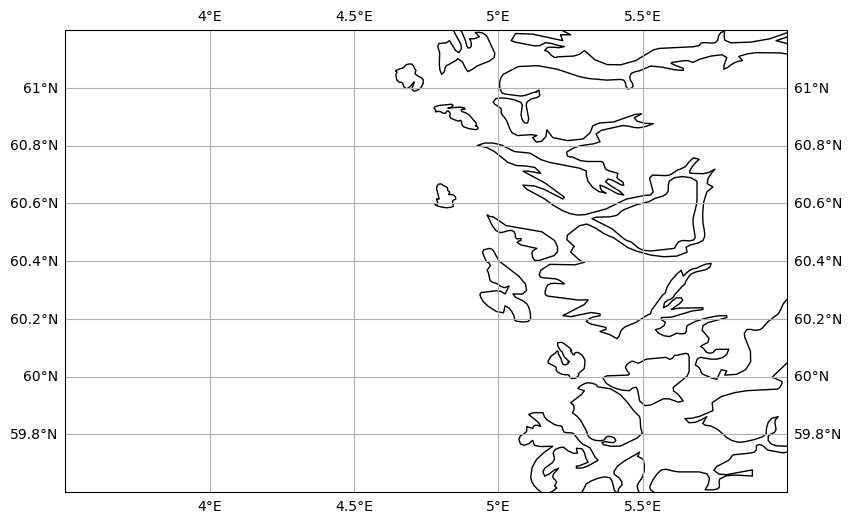

In [69]:

# Assuming 'subset' is your data with lat, lon
latitudes = subset.latitude.values
longitudes = subset.longitude.values

# Create a new matplotlib figure and set its size
fig = plt.figure(figsize=(12, 6))
minlon, maxlon, minlat, maxlat = (lon_range[0],lon_range[1], lat_range[0],lat_range[1])

# Create a Cartopy PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.COASTLINE)


# Plot the particles
scat = ax.scatter(longitudes, latitudes, color='blue', transform=ccrs.PlateCarree())
plt.show()


In [ ]:
subset['particles'].nunique.compute()